Successfully loaded data from E:/data_for_seg/
Fitting 5 folds for each of 100 candidates, totalling 500 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


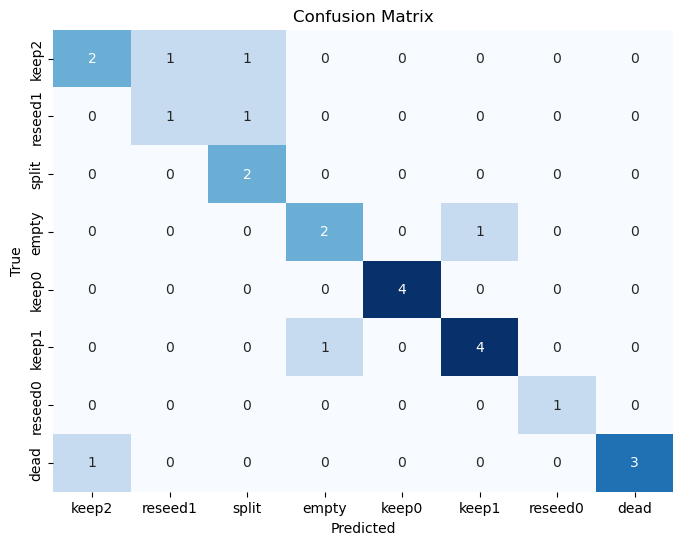

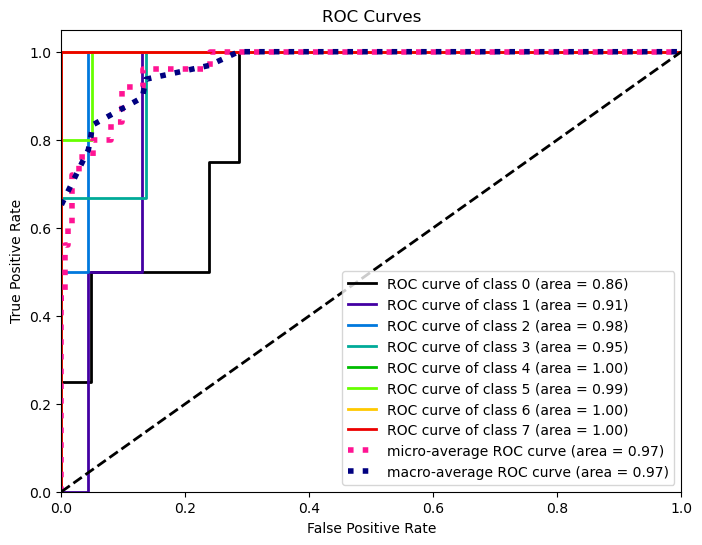

In [4]:
from importlib import reload
import classic_ML
reload(classic_ML)
import utility
reload(utility)
from utility import get_hard_disk_path
from classic_ML import optimize_and_evaluate_random_forest, perform_stratified_kfold_analysis

data_path = "Segmentation"
data_file = "statistics_features_IP_Q1_Q3.csv"
auc_score, best_params = optimize_and_evaluate_random_forest(data_path, data_file, random_state=30)

Successfully loaded data from E:/data_for_seg/


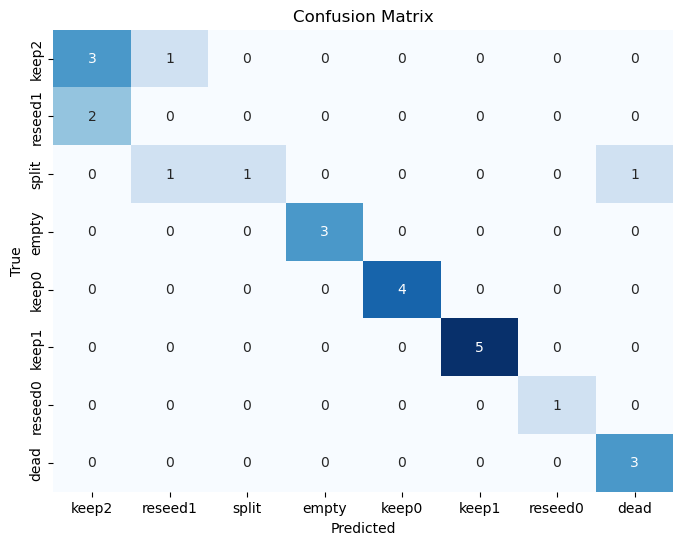

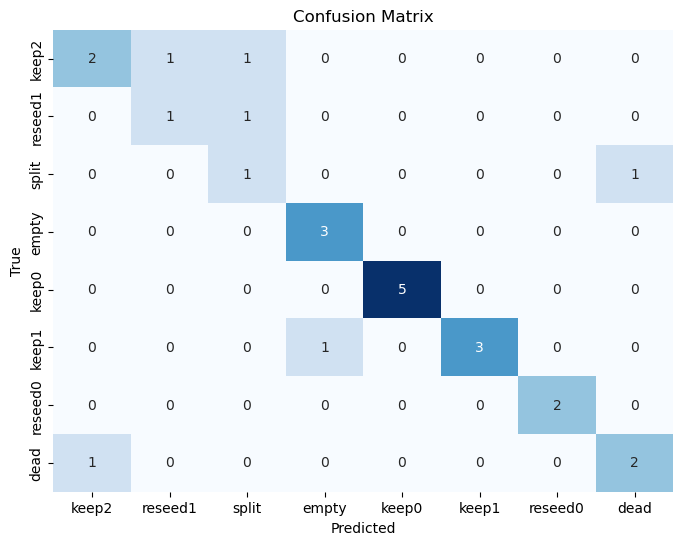

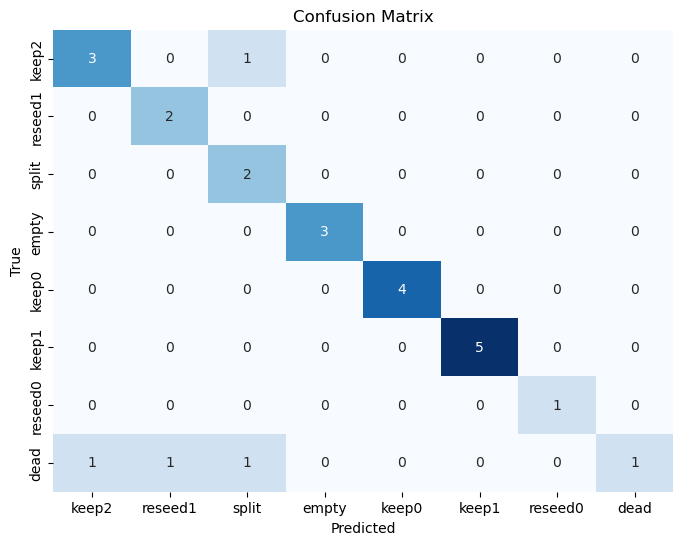

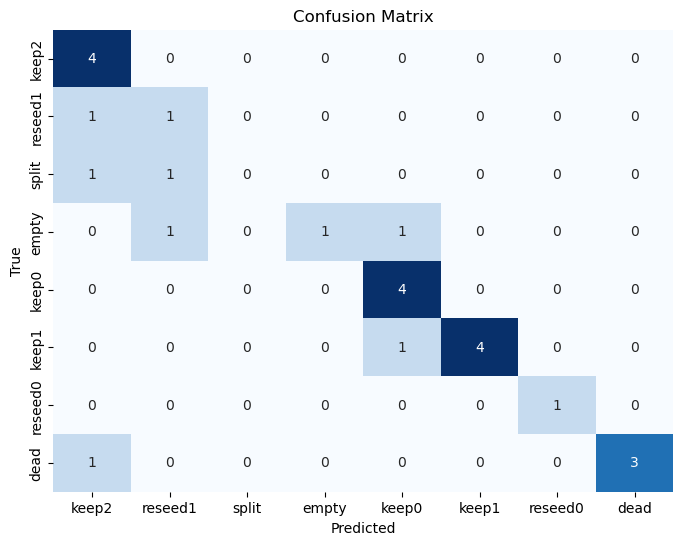

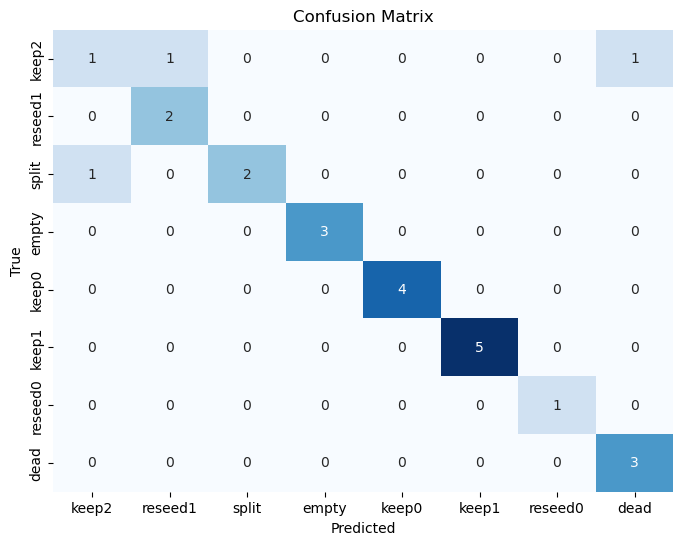

The figure layout has changed to tight


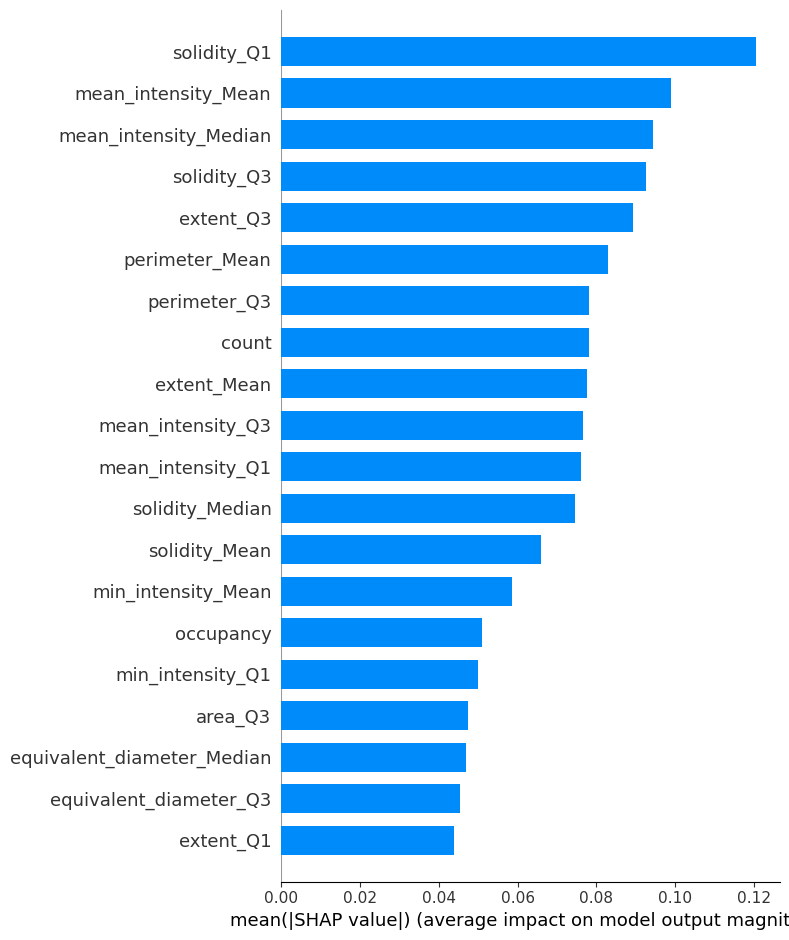

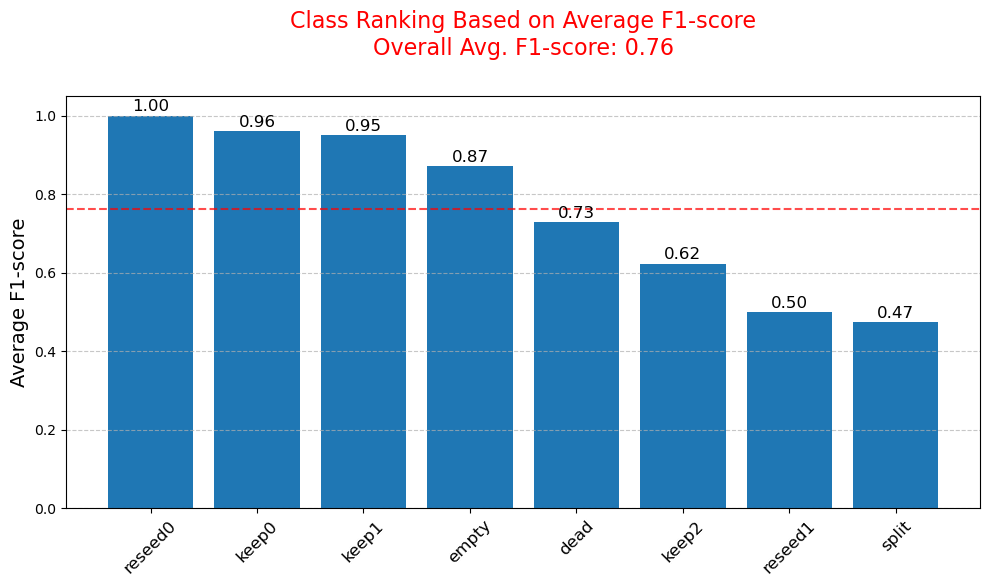

In [5]:
average_f1_scores, classifier = perform_stratified_kfold_analysis(data_path, data_file, "RandomForest", best_params, n_splits=5, random_state=42)

In [12]:
from importlib import reload
import classic_ML
reload(classic_ML)
import utility
reload(utility)
from classic_ML import tune_and_evaluate_xgb_classifier

best_params, test_f1_score = tune_and_evaluate_xgb_classifier(data_path, data_file, test_size=0.2, random_state=42, n_iter=200, cv_folds=10, verbose=2)

Successfully loaded data from E:/data_for_seg/
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


The least populated class in y has only 5 members, which is less than n_splits=10.


Best parameters found:  {'colsample_bytree': 0.49938834606422733, 'learning_rate': 0.01737738947090656, 'max_depth': 3, 'n_estimators': 101}
Best F1-score:  0.8001851851851851
Test F1-score:  0.7933015873015873


In [13]:
print(best_params)

{'colsample_bytree': 0.49938834606422733, 'learning_rate': 0.01737738947090656, 'max_depth': 3, 'n_estimators': 101}


Successfully loaded data from E:/data_for_seg/


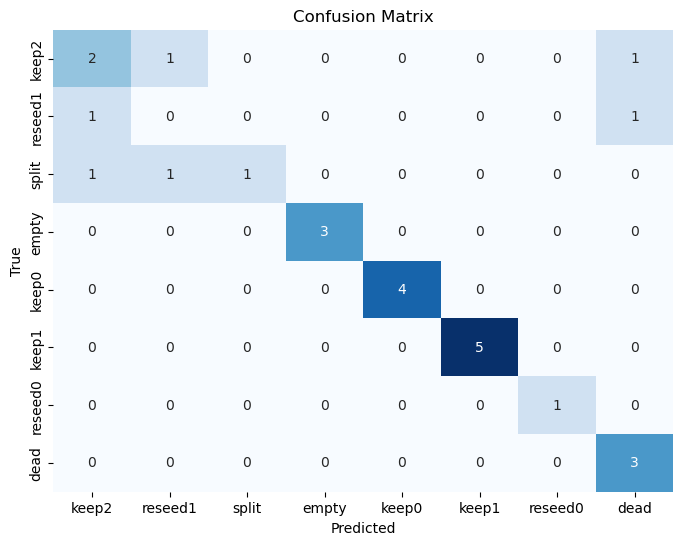

[20:54:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


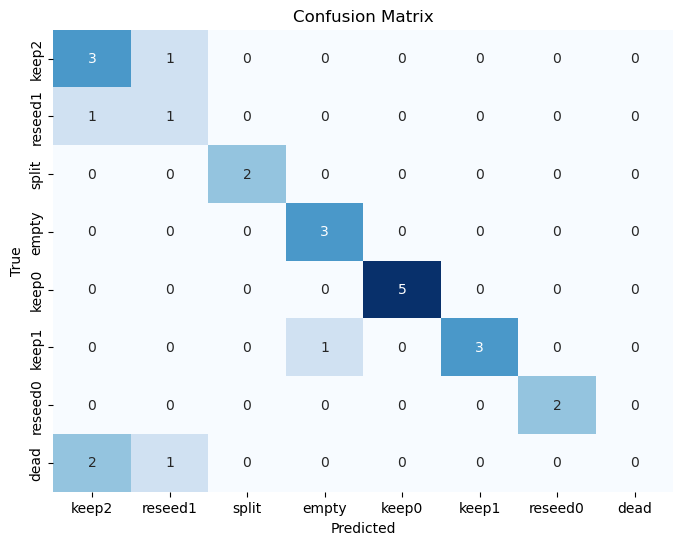

[20:54:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


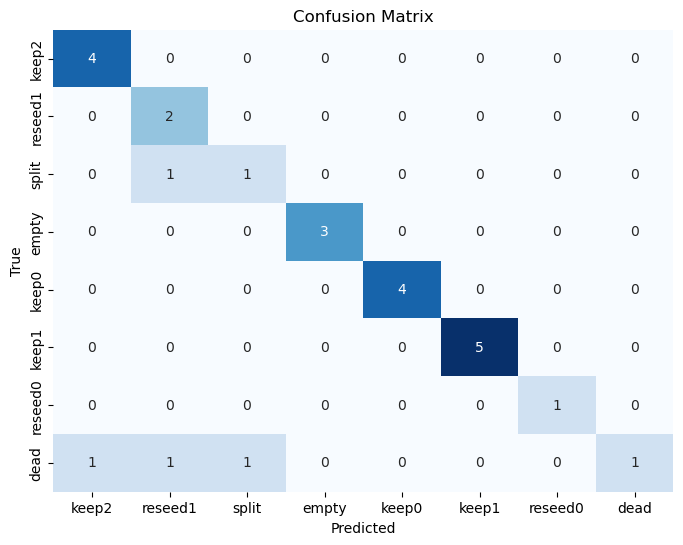

[20:54:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


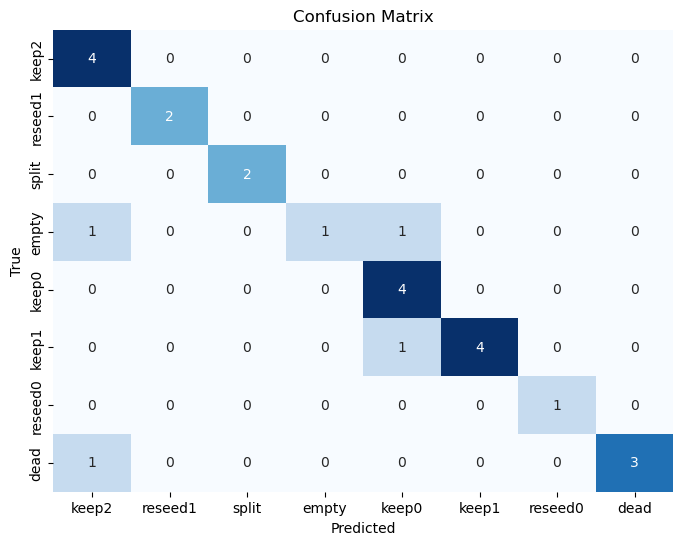

[20:54:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


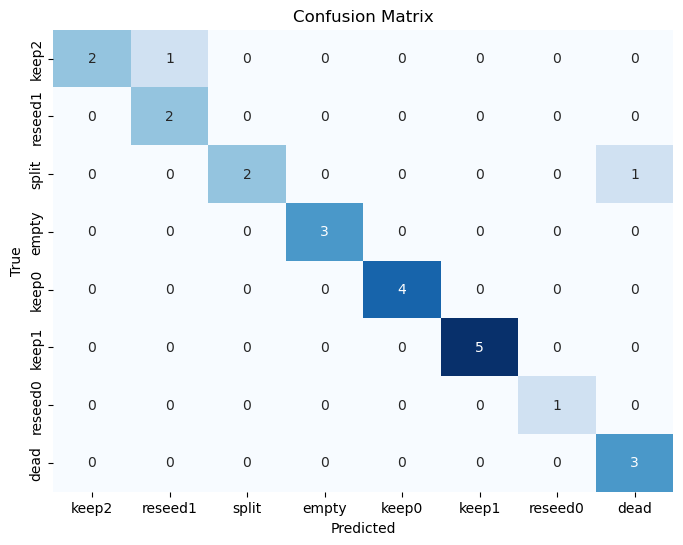

[20:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
The figure layout has changed to tight


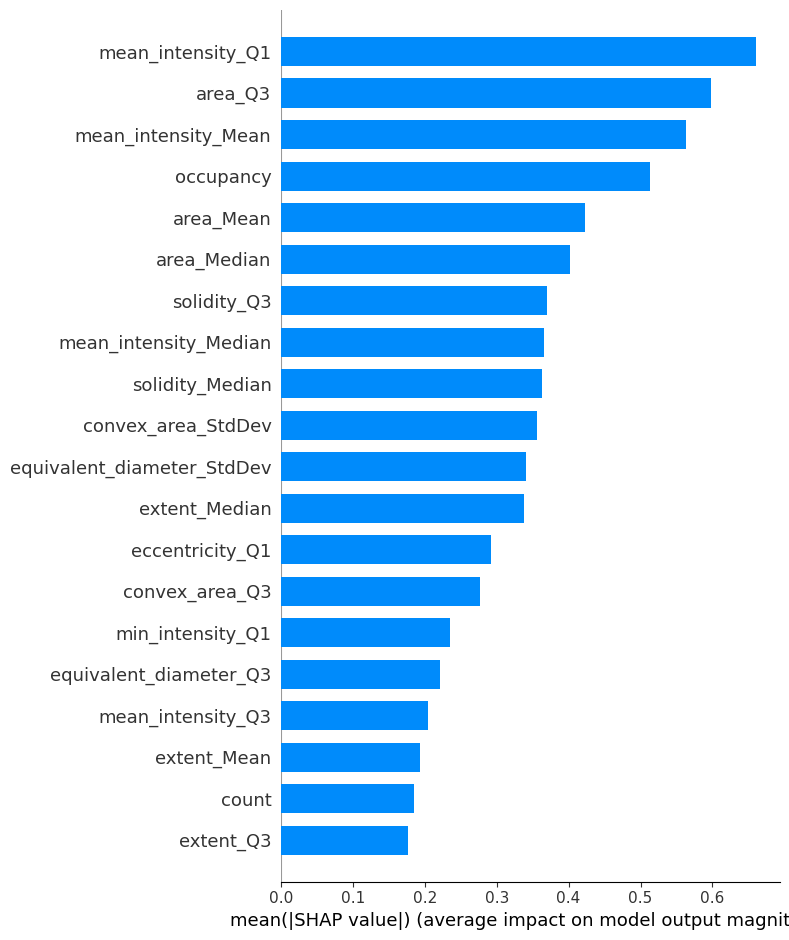

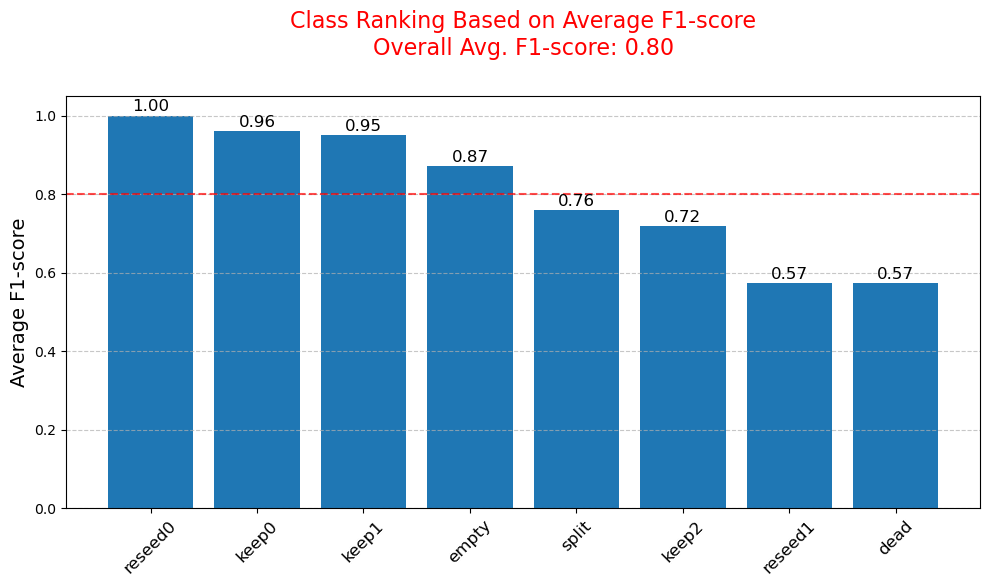

In [14]:
average_f1_scores, classifier = perform_stratified_kfold_analysis(data_path, data_file, "Xgboost", best_params, n_splits=5, random_state=42)

In [20]:
from importlib import reload
import classic_ML
reload(classic_ML)
import utility
reload(utility)
from classic_ML import optimize_catboost_with_optuna

best_params = optimize_catboost_with_optuna(data_path, data_file, test_size=0.2, random_state=42, n_trials=5)

[I 2024-03-19 21:00:43,648] A new study created in memory with name: no-name-38865d0e-686f-477d-a3c6-4a9abb9fe048


Successfully loaded data from E:/data_for_seg/


[I 2024-03-19 21:00:59,577] Trial 0 finished with value: 0.9166666666666666 and parameters: {'learning_rate': 0.023463054092554184, 'depth': 8, 'subsample': 0.4595112510876826, 'colsample_bylevel': 0.18208057063383426, 'min_data_in_leaf': 65}. Best is trial 0 with value: 0.9166666666666666.
[I 2024-03-19 21:03:18,543] Trial 1 finished with value: 0.9166666666666666 and parameters: {'learning_rate': 0.010814316455916283, 'depth': 10, 'subsample': 0.8132006958843883, 'colsample_bylevel': 0.38525768828347334, 'min_data_in_leaf': 36}. Best is trial 0 with value: 0.9166666666666666.
[I 2024-03-19 21:06:54,072] Trial 2 finished with value: 0.9166666666666666 and parameters: {'learning_rate': 0.00118341721852097, 'depth': 10, 'subsample': 0.45436952140144404, 'colsample_bylevel': 0.6033553044823232, 'min_data_in_leaf': 50}. Best is trial 0 with value: 0.9166666666666666.
[I 2024-03-19 21:06:55,426] Trial 3 finished with value: 0.9571428571428571 and parameters: {'learning_rate': 0.01536767557

Number of finished trials:  5
Best trial:
Value:  0.9571428571428571
Params: 
learning_rate: 0.015367675570655067
depth: 2
subsample: 0.27773986195121836
colsample_bylevel: 0.4324312944643773
min_data_in_leaf: 12


Successfully loaded data from E:/data_for_seg/


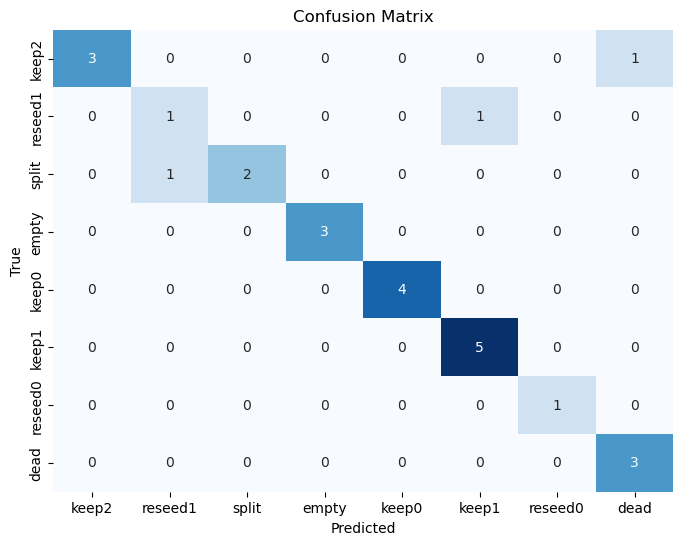

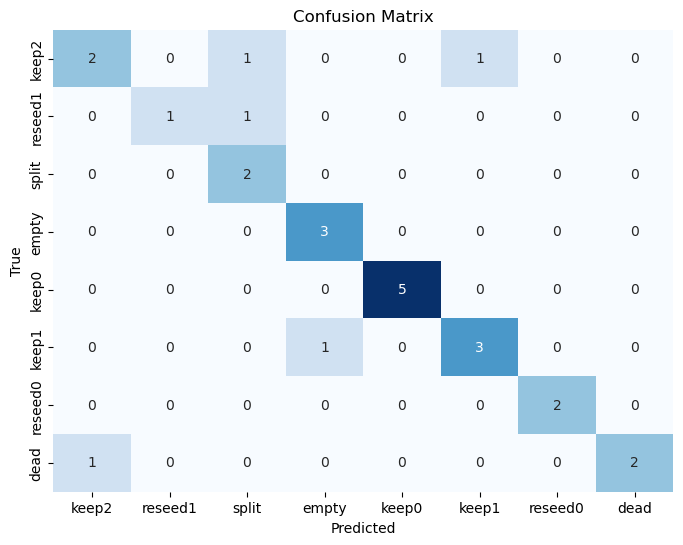

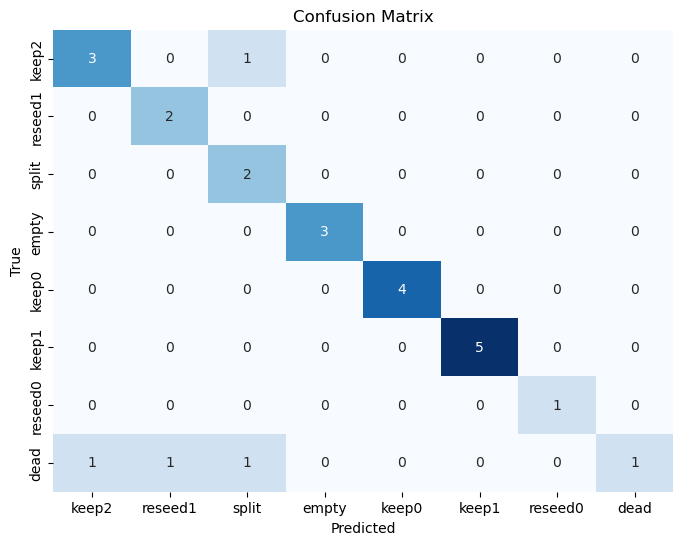

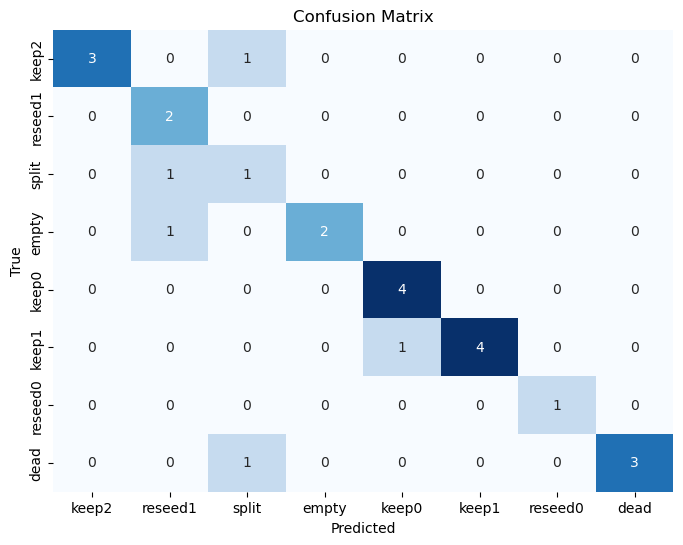

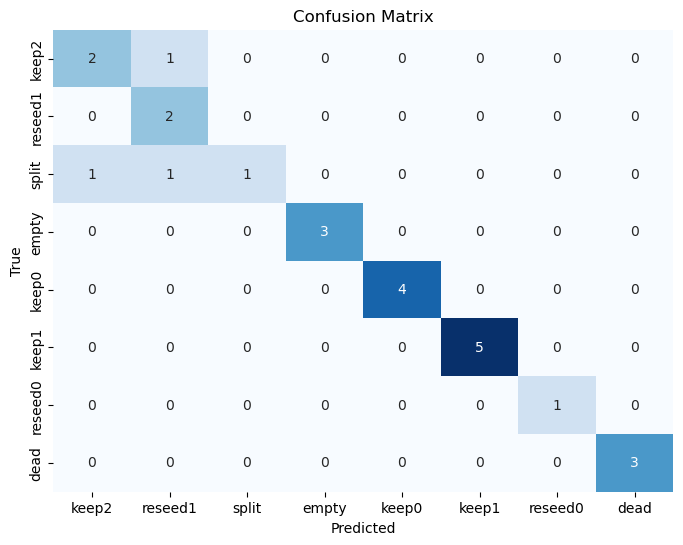

The figure layout has changed to tight


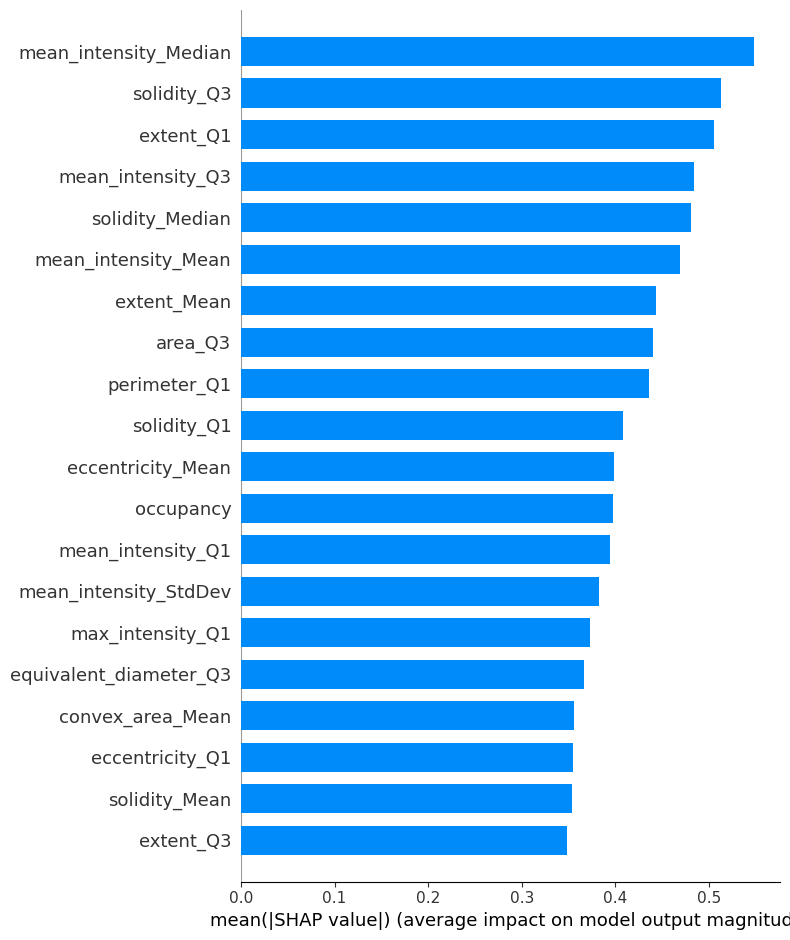

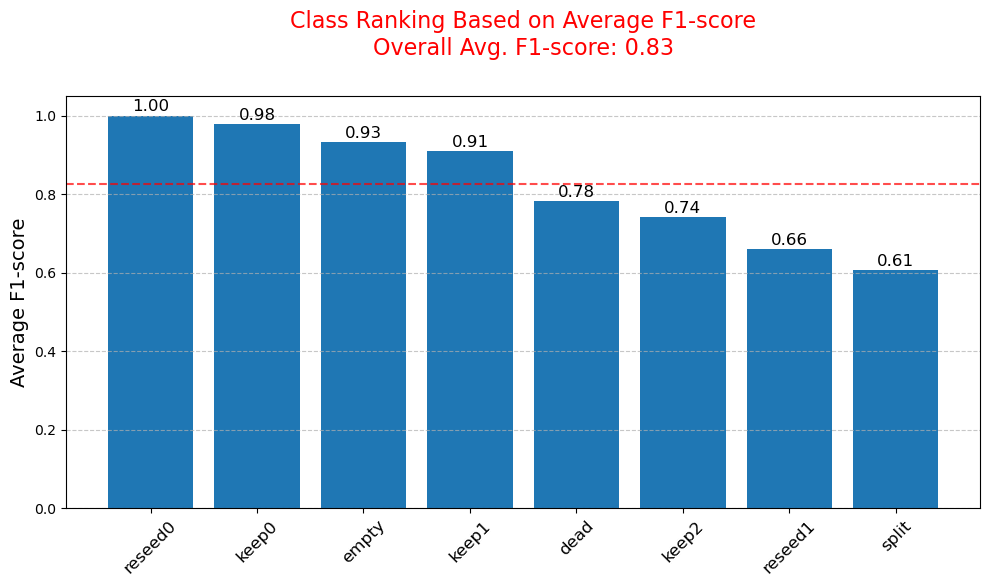

In [21]:
average_f1_scores, classifier = perform_stratified_kfold_analysis(data_path, data_file, "Catboost", best_params, n_splits=5, random_state=42)